# Gene Expression Analysis

Lorem ipsum...

In [1]:
from itertools import product

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from loguru import logger
from tqdm import tqdm

from philharmonic.utils import (
    load_cluster_json,
    parse_GO_database,
    plot_cluster,
    print_cluster,
)

In [2]:
# Initial Files
cluster_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_clusters.functional.json"
network_file_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_network.positive.tsv"
go_map_path = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_GO_map.csv"

GO_DB = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/go.obo"

# Gene Expression Datas
expression_file_path = "/mnt/home/ssledzieski/database/philharmonic/p_damicornis/Connelly2022_AxH_Pdam.counts"
deg_file_path = "/mnt/home/ssledzieski/database/philharmonic/p_damicornis/Connelly2022_SupplementaryData.xlsx"

# Output paths
prot_deg_cytoscape_table = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_proteins.deg.tsv"
clust_deg_cytoscape_table = "/mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_clusters.deg.tsv"

---

## Load Files

In [3]:
expression_df = pd.read_csv(expression_file_path, sep="\t", skiprows=1)
expression_df.columns = [i.split("/")[-1].split("_")[0] for i in expression_df.columns]
expression_df["Geneid"] = expression_df["Geneid"] + "-RA"
expression_df = expression_df.set_index("Geneid")
expression_df = expression_df.iloc[:, 5:]
expression_df = expression_df.loc[
    :, expression_df.columns.str.contains("Hw2")
]  # P. damicornis is only HW2

In [4]:
deg_df = pd.read_excel(
    deg_file_path,
    sheet_name="Table_S4A_DEGs_coral",
    header=1,
    index_col=0,
).rename(
    {
        "DE_Heat": "DE_Heat_control",
        "DE_Antibiotics": "DE_Antibiotics_control",
        "DE_Antibiotics.Heat": "DE_Antibiotics.Heat_control",
    },
    axis=1,
)
deg_df.index = deg_df.index + "-RA"

In [5]:
cluster_dict = load_cluster_json(cluster_file_path)
go_database = parse_GO_database(GO_DB)
full_G = nx.read_weighted_edgelist(network_file_path, delimiter="\t")

---

## Differentially Expressed Genes

In [6]:
deg_df.head()

,log2FoldChange_Heat_control,log2FoldChange_Antibiotics_control,log2FoldChange_Antibiotics.Heat_control,padj_Heat_control,padj_Antibiotics_control,padj_Antibiotics.Heat_control,DE_Heat_control,DE_Antibiotics_control,DE_Antibiotics.Heat_control,Gene_Name,Gene_Info,GO_Terms_IPS,GO_Terms_EM,KO_Terms_KAAS,KO_Terms_EM,KOG_Class_A,KOG_Class,Pfam_Domains
ID,,,,,,,,,,,,,,,,,,
pdam_00000001-RA,0.279896,0.067268,-0.254156,0.470404,0.896316,0.368372,NaN,NaN,NaN,NaN,unknown function,"GO:0005515, GO:0007165",NaN,NaN,NaN,NaN,NaN,PF00531
pdam_00000002-RA,-0.080965,-0.383006,-0.774704,0.850611,0.217305,0.000749,NaN,NaN,Downregulated,NaN,Uncharacterized 41.2 kDa protein in cps regio...,NaN,NaN,NaN,NaN,NaN,NaN,"PF00534, PF16095"
pdam_00000003-RA,0.209604,-0.319891,-0.669069,0.682981,0.501258,0.033824,NaN,NaN,Downregulated,NaN,unknown function,NaN,NaN,NaN,NaN,NaN,NaN,PF16095
pdam_00000006-RA,-0.090214,-0.379147,-0.613997,0.783354,0.116652,0.001072,NaN,NaN,Downregulated,NaN,unknown function,GO:0005515,NaN,NaN,NaN,NaN,NaN,PF13424
pdam_00000007-RA,-0.147869,-0.063538,-0.355971,0.609879,0.851811,0.052537,NaN,NaN,NaN,NaN,KLC1: Kinesin light chain 1 (Homo sapiens),GO:0005515,NaN,NaN,NaN,NaN,NaN,PF13424


In [7]:
connelly_hubs = [
    f"pdam_{p}-RA"
    for p in [
        "00016931",  # Blue
        "00015892",  # Dark green
        "00006619",  # Palevioletred3 (found) (antibiotics.heat up)
        "00012426",  # Lightsteelblue1 (found) (heat down, antibiotics up) immunomodulation via mRNA decay, immune related TFs
        "00024070",  # Orange
        "00014622",  # Royalblue
        "00010339",  # Bisque4
        "00002241",  # Floralwhite
        "00015203",  # Skyblue (found)  (antibiotics.heat down)
        "00002625",  # Cyan (found) (control up, heat up, antibiotics.heat down) cell cycle control, cell division, replication, recombination and repair --> related to the coral "brain"?
        "00009922",  # Grey60
        "00020781",  # Mediumpurple3 (found) (control up) signal transduction mechanisms, regulation of epithelial immune processes --> signaling response to stress
    ]
]

In [8]:
from philharmonic.utils import hash_cluster

p = connelly_hubs[11]  # 2, 3, 8, 9, 11
c = [v for v in cluster_dict.values() if p in v["members"]]
if len(c):
    c = c[0]
    logger.info(f"Loading cluster {hash_cluster(c['members'])} for protein {p}")
else:
    logger.error(f"Protein {p} not found in any cluster")
    c = None

2024-10-01 12:18:11.533 | INFO     | __main__:<module>:7 - Loading cluster 2242397535430222387 for protein pdam_00020781-RA


2024-10-01 12:18:11.538 | INFO     | __main__:<module>:1 - Cluster of 14 proteins [pdam_00002334-RA, pdam_00021700-RA, pdam_00013503-RA, ...] (hash 2242397535430222387)
6 proteins re-added by ReCIPE (degree, 0.75)
Edges: 0
Triangles: 0
Max Degree: 0
Top Terms:
		GO:0075015 - <formation of infection structure> (3)
		GO:0050650 - <chondroitin sulfate proteoglycan biosynthetic process> (3)
		GO:0030206 - <chondroitin sulfate biosynthetic process> (3)
		GO:0006486 - <protein glycosylation> (3)
		GO:0070940 - <obsolete dephosphorylation of RNA polymerase II C-terminal domain> (2)
		GO:0014898 - <cardiac muscle hypertrophy in response to stress> (2)
		GO:0006260 - <DNA replication> (2)
		GO:0035023 - <regulation of Rho protein signal transduction> (2)
		GO:0021680 - <cerebellar Purkinje cell layer development> (2)
		GO:0060055 - <angiogenesis involved in wound healing> (2)



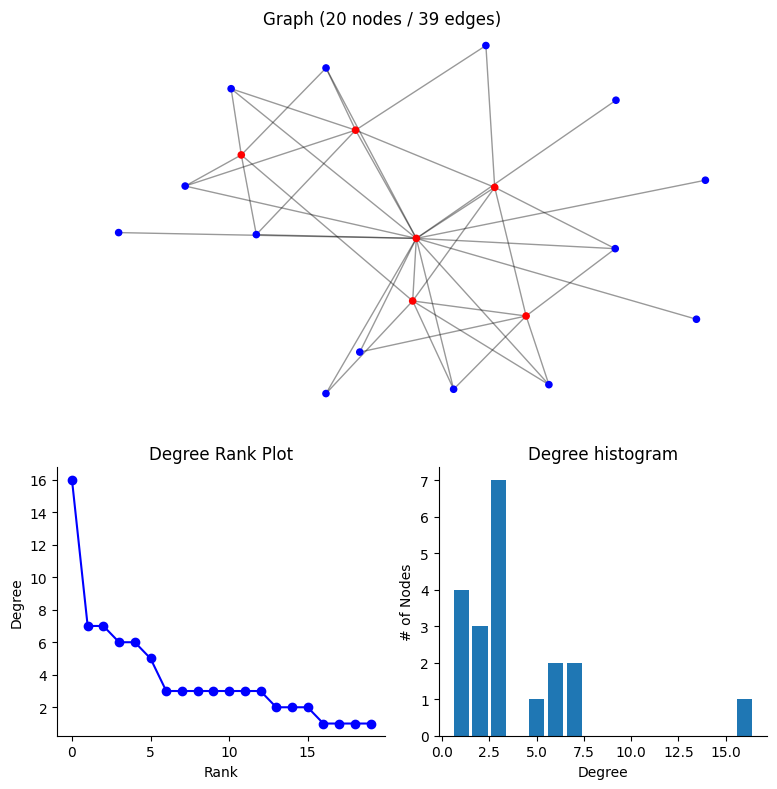

In [9]:
logger.info(print_cluster(c, go_database, 10, return_str=True))
plot_cluster(c, full_G, use_recipe=True)

---


## Export Differential Expression for Cytoscape

In [10]:
philharmonic_prots = set.union(
    *[set(c["members"]) for c in cluster_dict.values()]
).intersection(deg_df.index)
prot_deg_cytoscape_table_df = deg_df.loc[list(philharmonic_prots), ["log2FoldChange_Heat_control", "log2FoldChange_Antibiotics_control", "log2FoldChange_Antibiotics.Heat_control"]]

logger.info(f"Writing {len(philharmonic_prots)} entries to {prot_deg_cytoscape_table}")
prot_deg_cytoscape_table_df.to_csv(prot_deg_cytoscape_table, sep="\t")

2024-10-01 12:18:11.730 | INFO     | __main__:<module>:6 - Writing 5625 entries to /mnt/home/ssledzieski/Projects/philharmonic-experiments/results/p_damicornis/20240917-pdamAll-phil_v0.3.0/20240917-pdamAll-phil_v0.3.0_proteins.deg.tsv


<Axes: >

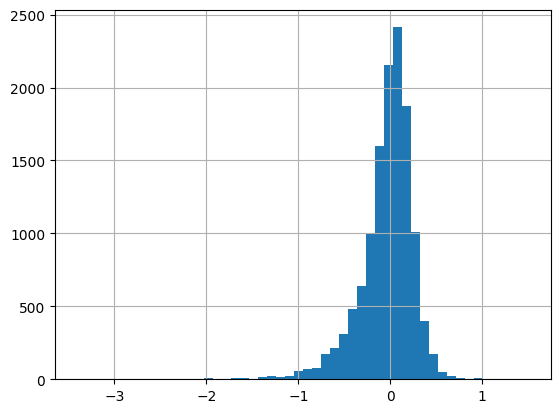

In [25]:
deg_df["log2FoldChange_Heat_control"].hist(bins=50)

In [28]:
conditions = ["Heat_control", "Antibiotics_control", "Antibiotics.Heat_control"]
p_thresh = 0.05

cluster_de_df = []

for k, cl in tqdm(cluster_dict.items(), total=len(cluster_dict)):
    cluster_members = list(set(cl["members"]).intersection(deg_df.index))
    diffexp_df = deg_df.loc[cluster_members]
    cluster_row = [k]

    for cond in conditions:
        # log2FoldChange
        if len(diffexp_df):
            cluster_row.append(np.mean(diffexp_df[f"log2FoldChange_{cond}"]))
        else:
            cluster_row.append(np.nan)
        # padj
        cluster_row.append(np.sum(diffexp_df[f"padj_{cond}"] < p_thresh))
        # DE_Up
        cluster_row.append(np.sum(diffexp_df[f"DE_{cond}"] == "Upregulated"))
        # DE_Down
        cluster_row.append(np.sum(diffexp_df[f"DE_{cond}"] == "Downregulated"))
    cluster_de_df.append(cluster_row)

cluster_de_df = pd.DataFrame(cluster_de_df)
cluster_de_df.columns = ["key"] + [
    f"{j}_{i}"
    for i, j in product(conditions, ["log2FoldChange", "padj", "DE_Up", "DE_Down"])
]
cluster_de_df = cluster_de_df.set_index("key")

100%|██████████| 610/610 [00:01<00:00, 457.50it/s]


In [29]:
cluster_de_df.head()
cluster_de_df.to_csv(clust_deg_cytoscape_table, sep="\t")

---

## Raw Expression

In [121]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

In [53]:
philharmonic_proteins = set.union(*[set(i["members"]) for i in cluster_dict.values()])
expression_philharmonic = expression_df.loc[
    expression_df.index.intersection(philharmonic_proteins)
]

In [54]:
logger.info(f"Expression data has shape: {expression_philharmonic.shape}")
expression_philharmonic.head()

2024-09-27 16:25:34.513 | INFO     | __main__:<module>:1 - Expression data has shape: (8864, 11)


,Hw2-1a,Hw2-1b,Hw2-1c,Hw2-4a,Hw2-4b,Hw2-4c,Hw2-5a,Hw2-5b,Hw2-5c,Hw2-6b,Hw2-6c
Geneid,,,,,,,,,,,
pdam_00021773-RA,2,30,20,2,8,7,38,30,57,37,13
pdam_00021774-RA,17,98,27,35,49,41,62,67,58,70,77
pdam_00022010-RA,157,254,182,141,132,144,310,283,225,217,225
pdam_00022011-RA,13,6,14,15,14,10,21,42,18,38,20
pdam_00012251-RA,1207,1160,1836,831,1247,1188,1774,2317,1243,1503,1388


In [67]:
def vst(counts, alpha=1):
    """
    Apply a variance stabilizing transformation to count data.

    Parameters:
    counts (array-like): The input count data
    alpha (float): A small constant to avoid taking log of zero

    Returns:
    numpy.ndarray: The transformed data
    """
    counts = np.asarray(counts)
    return np.log2(counts + np.sqrt(counts + alpha**2))


def bicor_matrix(X, epsilon=1e-12):
    """
    Compute pairwise bi-weight mid-correlation for all genes.

    Parameters:
    X (np.ndarray): A 2D array of shape (n_genes, n_samples) containing normalized count data
    epsilon (float): Small value to avoid division by zero

    Returns:
    np.ndarray: A 2D array of shape (n_genes, n_genes) containing pairwise correlations
    """
    n_genes, n_samples = X.shape

    # Compute median and MAD for each gene
    gene_medians = np.median(X, axis=1)
    gene_mads = np.median(np.abs(X - gene_medians[:, np.newaxis]), axis=1)

    # Handle genes with zero MAD
    gene_mads = np.maximum(gene_mads, epsilon)

    # Compute U matrix
    U = (X - gene_medians[:, np.newaxis]) / (9 * gene_mads[:, np.newaxis])

    # Compute weights
    W = (1 - U**2) ** 2
    W[np.abs(U) >= 1] = 0

    # Compute weighted centered expression
    X_weighted = W * (X - gene_medians[:, np.newaxis])

    # Compute pairwise correlations
    norms = np.sqrt(np.sum(X_weighted**2, axis=1))
    norms = np.maximum(norms, epsilon)  # Avoid division by zero
    corr_matrix = np.dot(X_weighted, X_weighted.T) / np.outer(norms, norms)

    # Set diagonal to 1 and handle numerical instability
    np.fill_diagonal(corr_matrix, 1)
    corr_matrix = np.clip(corr_matrix, -1, 1)

    return corr_matrix

In [68]:
exp_norm = vst(expression_philharmonic.values)
correlations = bicor_matrix(exp_norm)
corr_df = pd.DataFrame(
    correlations,
    index=expression_philharmonic.index,
    columns=expression_philharmonic.index,
)

In [124]:
corr_df.values.min()

-0.9594949616026203

In [125]:
# Spectral clustering
from sklearn.cluster import SpectralClustering

n_clusters = len(cluster_dict)
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
spectral_clusters = spectral.fit_predict(exp_norm)

In [69]:
corr_df.head()

Geneid,pdam_00021773-RA,pdam_00021774-RA,pdam_00022010-RA,pdam_00022011-RA,pdam_00012251-RA,pdam_00012269-RA,pdam_00012254-RA,pdam_00012275-RA,pdam_00012274-RA,pdam_00012276-RA,...,pdam_00007170-RA,pdam_00007153-RA,pdam_00007128-RA,pdam_00007134-RA,pdam_00007135-RA,pdam_00007127-RA,pdam_00007130-RA,pdam_00007147-RA,pdam_00007148-RA,pdam_00007149-RA
Geneid,,,,,,,,,,,,,,,,,,,,,
pdam_00021773-RA,1.000000,0.688317,0.828757,0.329509,0.487152,0.281210,0.544550,0.611819,0.642461,0.649482,...,0.479313,0.473509,0.558466,0.836971,0.673735,0.293039,0.819080,0.651872,0.465168,0.131760
pdam_00021774-RA,0.688317,1.000000,0.734042,0.161584,0.097818,0.271543,0.327174,0.508241,0.647418,0.768428,...,0.172335,0.003721,0.433743,0.805192,0.469252,0.538216,0.676417,0.759375,0.157224,0.165878
pdam_00022010-RA,0.828757,0.734042,1.000000,0.347310,0.444035,0.453056,0.536718,0.357827,0.685770,0.649896,...,0.402132,0.525013,0.547905,0.937712,0.594104,0.542778,0.797824,0.660343,0.448841,0.000552
pdam_00022011-RA,0.329509,0.161584,0.347310,1.000000,0.578008,-0.212224,0.821714,0.703800,0.761574,0.212986,...,0.630555,0.479475,0.840521,0.485373,0.786575,0.714552,0.437439,0.034240,0.886737,-0.702546
pdam_00012251-RA,0.487152,0.097818,0.444035,0.578008,1.000000,-0.007237,0.874596,0.421031,0.571345,0.079549,...,0.942775,0.671105,0.627261,0.449910,0.667656,0.412199,0.478243,0.061217,0.777386,-0.556945


Optimal soft-thresholding power: 1


/tmp/ipykernel_1836019/3336379524.py:32: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(dissimilarity, method='average')


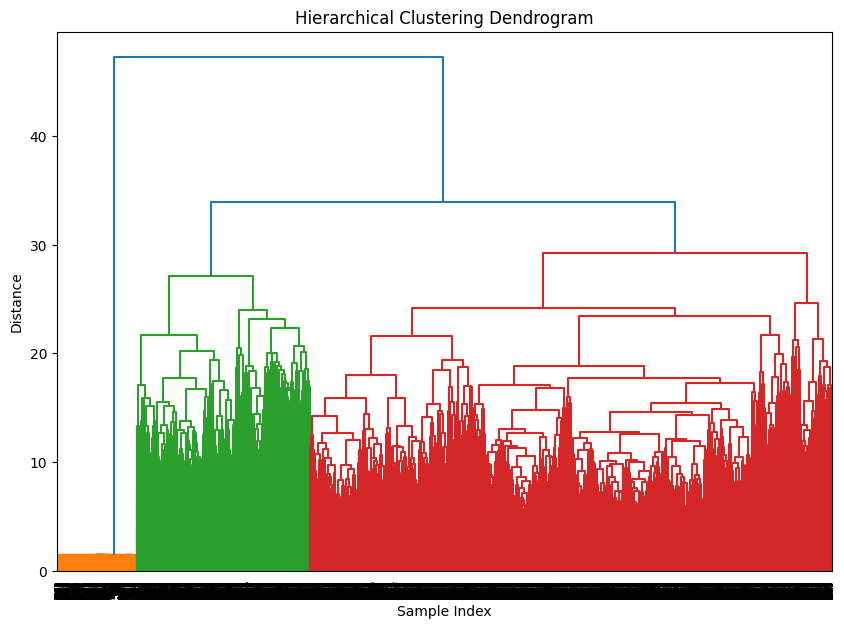

In [80]:
def scale_free_fit(k, p):
    """Calculate scale-free topology fit index."""
    return np.sum(
        (
            np.log(p + 1e-9)
            - (
                -np.log(k) * np.polyfit(np.log(k), np.log(p + 1e-9), 1)[0]
                - np.polyfit(np.log(k), np.log(p + 1e-9), 1)[1]
            )
        )
        ** 2
    )


def calculate_sft(corr, power_range=range(1, 21)):
    """Calculate Scale-Free Topology Fit Index for a range of powers."""
    sft = []
    for power in power_range:
        adj = np.abs(corr) ** power
        k = np.sum(adj, axis=0)
        p = np.histogram(k, bins=10)[0] / float(np.sum(np.histogram(k, bins=10)[0]))
        sft.append(scale_free_fit(np.histogram(k, bins=10)[1][:-1], p))
    return sft


def soft_threshold(corr, power_range=range(1, 21), r_sq_threshold=0.8):
    """Determine the soft-thresholding power based on scale-free topology fit."""
    sft = calculate_sft(corr, power_range)
    power = power_range[np.argmax(np.array(sft) > r_sq_threshold)]
    return power if power > 0 else power_range[-1]


def hierarchical_clustering(corr, power):
    """Perform hierarchical clustering based on the soft-thresholding power."""
    adj = np.abs(corr) ** power
    dissimilarity = 1 - adj
    return linkage(dissimilarity, method="average")


# Calculate soft-thresholding power
power = soft_threshold(corr_df.values)
print(f"Optimal soft-thresholding power: {power}")

# Perform hierarchical clustering
Z = hierarchical_clustering(corr_df.values, power)

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# # Plot Scale-Free Topology Fit Index
# plt.figure(figsize=(10, 7))
# plt.plot(range(1, 21), calculate_sft(X))
# plt.title('Scale-Free Topology Fit Index')
# plt.xlabel('Soft-Thresholding Power')
# plt.ylabel('Scale-Free Topology Fit Index')
# plt.axvline(x=power, color='r', linestyle='--')
# plt.show()

In [84]:
def get_k_clusters(Z, k):
    """
    Extract k clusters from the linkage matrix.

    Parameters:
    Z (ndarray): The linkage matrix
    k (int): The desired number of clusters

    Returns:
    ndarray: An array of cluster labels
    """
    return fcluster(Z, k, criterion="maxclust")

In [85]:
gexp_clusters = get_k_clusters(Z, len(cluster_dict))

In [97]:
prot_to_cluster = {}
for k, cl in cluster_dict.items():
    for m in cl["members"]:
        prot_to_cluster[m] = k
phil_clusters = [prot_to_cluster[i] for i in expression_philharmonic.index]

In [98]:
len(gexp_clusters), len(phil_clusters)

(8864, 8864)

In [102]:
random_clustering = np.random.choice(np.unique(gexp_clusters), len(gexp_clusters))

In [117]:
from sklearn.metrics.cluster import adjusted_rand_score


def bootstrap_ari_test(
    ground_truth, clustering1, clustering2, n_bootstrap=10000, alpha=0.05
):
    """
    Perform a bootstrap test to compare two clusterings against a ground truth.

    Parameters:
    ground_truth (array-like): Ground truth cluster labels
    clustering1 (array-like): First set of cluster labels to compare
    clustering2 (array-like): Second set of cluster labels to compare
    n_bootstrap (int): Number of bootstrap samples
    alpha (float): Significance level for the confidence interval

    Returns:
    dict: A dictionary containing the test results
    """
    n_samples = len(ground_truth)

    # Compute original ARI scores
    ari1 = adjusted_rand_score(ground_truth, clustering1)
    ari2 = adjusted_rand_score(ground_truth, clustering2)

    # Bootstrap resampling
    bootstrap_diff = np.zeros(n_bootstrap)
    for i in tqdm(range(n_bootstrap)):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        bootstrap_ari1 = adjusted_rand_score(
            ground_truth[indices], clustering1[indices]
        )
        bootstrap_ari2 = adjusted_rand_score(
            ground_truth[indices], clustering2[indices]
        )
        bootstrap_diff[i] = bootstrap_ari1 - bootstrap_ari2

    # Compute confidence interval
    ci_lower, ci_upper = np.percentile(
        bootstrap_diff, [alpha / 2 * 100, (1 - alpha / 2) * 100]
    )

    # Compute p-value
    p_value = min(np.mean(bootstrap_diff >= 0), np.mean(bootstrap_diff <= 0)) * 2

    return {
        "ARI1": ari1,
        "ARI2": ari2,
        "ARI_diff": ari1 - ari2,
        "CI_lower": ci_lower,
        "CI_upper": ci_upper,
        "p_value": p_value,
    }


ari_boots = bootstrap_ari_test(
    gexp_clusters, np.array(phil_clusters), random_clustering
)

100%|██████████| 10000/10000 [00:56<00:00, 176.58it/s]


In [118]:
logger.info(
    f"ARI between expression and philharmonic clusters: {ari_boots['ARI1']:.3f}"
)
logger.info(f"ARI between expression and random clusters: {ari_boots['ARI2']:.3f}")
logger.info(f"ARI difference: {ari_boots['ARI_diff']:.3f}")
logger.info(f"95% CI: [{ari_boots['CI_lower']:.3f}, {ari_boots['CI_upper']:.3f}]")
logger.info(f"p-value: {ari_boots['p_value']:.3f}")

2024-09-27 17:05:27.312 | INFO     | __main__:<module>:1 - ARI between expression and philharmonic clusters: 0.001
2024-09-27 17:05:27.313 | INFO     | __main__:<module>:2 - ARI between expression and random clusters: 0.000
2024-09-27 17:05:27.313 | INFO     | __main__:<module>:3 - ARI difference: 0.001
2024-09-27 17:05:27.314 | INFO     | __main__:<module>:4 - 95% CI: [0.000, 0.001]
2024-09-27 17:05:27.315 | INFO     | __main__:<module>:5 - p-value: 0.002


In [119]:
from sklearn.metrics.cluster import normalized_mutual_info_score


def bootstrap_nmi_test(
    ground_truth, clustering1, clustering2, n_bootstrap=10000, alpha=0.05
):
    """
    Perform a bootstrap test to compare two clusterings against a ground truth.

    Parameters:
    ground_truth (array-like): Ground truth cluster labels
    clustering1 (array-like): First set of cluster labels to compare
    clustering2 (array-like): Second set of cluster labels to compare
    n_bootstrap (int): Number of bootstrap samples
    alpha (float): Significance level for the confidence interval

    Returns:
    dict: A dictionary containing the test results
    """
    n_samples = len(ground_truth)

    # Compute original ARI scores
    nmi1 = normalized_mutual_info_score(ground_truth, clustering1)
    nmi2 = normalized_mutual_info_score(ground_truth, clustering2)

    # Bootstrap resampling
    bootstrap_diff = np.zeros(n_bootstrap)
    for i in tqdm(range(n_bootstrap)):
        indices = np.random.choice(n_samples, n_samples, replace=True)
        bootstrap_nmi1 = normalized_mutual_info_score(
            ground_truth[indices], clustering1[indices]
        )
        bootstrap_nmi2 = normalized_mutual_info_score(
            ground_truth[indices], clustering2[indices]
        )
        bootstrap_diff[i] = bootstrap_nmi1 - bootstrap_nmi2

    # Compute confidence interval
    ci_lower, ci_upper = np.percentile(
        bootstrap_diff, [alpha / 2 * 100, (1 - alpha / 2) * 100]
    )

    # Compute p-value
    p_value = min(np.mean(bootstrap_diff >= 0), np.mean(bootstrap_diff <= 0)) * 2

    return {
        "NMI1": nmi1,
        "NMI2": nmi2,
        "NMI_diff": nmi1 - nmi2,
        "CI_lower": ci_lower,
        "CI_upper": ci_upper,
        "p_value": p_value,
    }


nmi_boots = bootstrap_nmi_test(
    gexp_clusters, np.array(phil_clusters), random_clustering
)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [01:48<00:00, 92.09it/s]


In [120]:
logger.info(
    f"NMI between expression and philharmonic clusters: {nmi_boots['NMI1']:.3f}"
)
logger.info(f"NMI between expression and random clusters: {nmi_boots['NMI2']:.3f}")
logger.info(f"NMI difference: {nmi_boots['NMI_diff']:.3f}")
logger.info(f"95% CI: [{nmi_boots['CI_lower']:.3f}, {nmi_boots['CI_upper']:.3f}]")
logger.info(f"p-value: {nmi_boots['p_value']:.3f}")

2024-09-27 17:07:15.939 | INFO     | __main__:<module>:1 - NMI between expression and philharmonic clusters: 0.403
2024-09-27 17:07:15.940 | INFO     | __main__:<module>:2 - NMI between expression and random clusters: 0.407
2024-09-27 17:07:15.940 | INFO     | __main__:<module>:3 - NMI difference: -0.004
2024-09-27 17:07:15.940 | INFO     | __main__:<module>:4 - 95% CI: [-0.009, -0.004]
2024-09-27 17:07:15.940 | INFO     | __main__:<module>:5 - p-value: 0.000
